### **UNIVERSIDAD GALILEO**
### Posgrado en Análisis y Predicción de Datos
### Text Mining & Image Recognition
### Luis Florian, 0710082, Sección U

### **Laboratorio # 2**

#### **Loading Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

#### **Loading Dataset**

In [19]:
URL = 'train.csv'
dataset = pd.read_csv(URL)
dataset.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train, test = train_test_split(dataset, test_size=0.30, random_state=42)

print("Train shape:", train.shape)
print("Test shape: ", test.shape)

Train shape: (29400, 785)
Test shape:  (12600, 785)


#### **Splitting**

In [42]:
x_train = np.array(train.iloc[:,1:])
y_train = np.array(train.iloc[:,0])

x_test = np.array(test.iloc[:,1:])
y_test = np.array(test.iloc[:,0])

#### **Convertir a 28x28**

In [43]:
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))

#### **Exploring images**

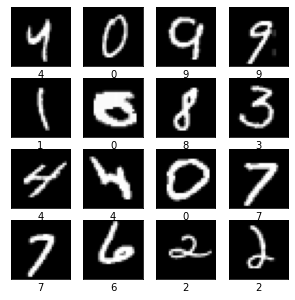

In [44]:
plt.figure(figsize=(5,5))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(y_train[i])
plt.show()

In [46]:
print(x_train.shape)
print(y_train.shape)

(29400, 28, 28)
(29400,)


#### **Scaling**

In [47]:
x_train = x_train / 255
x_test = x_test / 255

# Reshape de las imagenes
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convertir la variable categórica a binaria
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

#### **Neural Network**

In [48]:
input_shape = (28, 28, 1)

model_ANN = Sequential([
                        Flatten(input_shape = input_shape),
                        Dense(units=1000, activation='relu', kernel_initializer='uniform'),
                        Dense(units=500, activation='relu', kernel_initializer='uniform'),
                        Dense(units=10, activation='softmax'),
])

model_ANN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5010      
Total params: 1,290,510
Trainable params: 1,290,510
Non-trainable params: 0
_________________________________________________________________


#### **Training**

In [49]:
batch_size = 128
epochs = 5

model_ANN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_ANN = model_ANN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5
230/230 [==============================] - 5s 20ms/step - loss: 0.2771 - accuracy: 0.9180
Epoch 2/5
230/230 [==============================] - 4s 18ms/step - loss: 0.0983 - accuracy: 0.9699
Epoch 3/5
230/230 [==============================] - 4s 19ms/step - loss: 0.0623 - accuracy: 0.9806
Epoch 4/5
230/230 [==============================] - 4s 18ms/step - loss: 0.0372 - accuracy: 0.9877
Epoch 5/5
230/230 [==============================] - 4s 17ms/step - loss: 0.0256 - accuracy: 0.9912


In [50]:
score_ANN = model_ANN.evaluate(x_test, y_test, verbose=0)
print("Test loss:     ", score_ANN[0])
print("Test accuracy: ", score_ANN[1])

Test loss:      0.10020539909601212
Test accuracy:  0.9729365110397339


#### **Convolutional Network**

In [51]:
input_shape = (28, 28, 1)

model_CNN = Sequential([
                        Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                        MaxPool2D(pool_size=(2,2)),
                        Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
                        MaxPool2D(pool_size=(2,2)),
                        Flatten(),
                        Dense(units=128, activation='relu'),
                        Dense(units=10, activation='softmax'),
])

model_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

#### **Training**

In [52]:
batch_size = 128
epochs = 5

model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history_CNN = model_CNN.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/5
230/230 [==============================] - 29s 125ms/step - loss: 0.3550 - accuracy: 0.8938
Epoch 2/5
230/230 [==============================] - 21s 90ms/step - loss: 0.0859 - accuracy: 0.9736
Epoch 3/5
230/230 [==============================] - 21s 91ms/step - loss: 0.0596 - accuracy: 0.9813
Epoch 4/5
230/230 [==============================] - 20s 88ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 5/5
230/230 [==============================] - 20s 88ms/step - loss: 0.0378 - accuracy: 0.9882


In [53]:
score_CNN = model_CNN.evaluate(x_test, y_test, verbose=0)
print("Test loss:     ", score_CNN[0])
print("Test accuracy: ", score_CNN[1])

Test loss:      0.04820173978805542
Test accuracy:  0.9858730435371399


#### **Comparación**

In [54]:
comparative_table = pd.DataFrame([['ANN', score_ANN[0], score_ANN[1]], ['CNN', score_CNN[0], score_CNN[1]]],
                                 columns=['TYPE', 'LOSS', 'ACCURACY'])
comparative_table

,TYPE,LOSS,ACCURACY
0,ANN,0.100205,0.972937
1,CNN,0.048202,0.985873


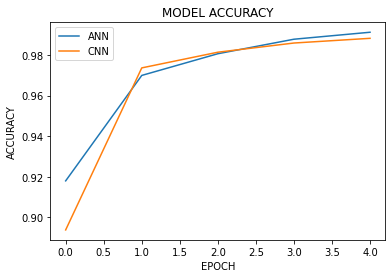

In [55]:
plt.plot(history_ANN.history['accuracy'], label='ANN')
plt.plot(history_CNN.history['accuracy'], label='CNN')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

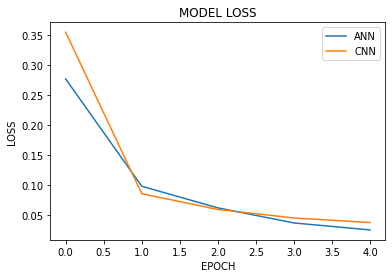

In [56]:
plt.plot(history_ANN.history['loss'], label='ANN')
plt.plot(history_CNN.history['loss'], label='CNN')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()
plt.show()